# Related to Figure 2b

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the scaled and smoothed expression matrix 
df_plot = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure2/1.data/sort_v3.txt', index_col=0, sep='\t')
df_plot

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
AL109930.1,2.000000,2.000000,2.000000,1.009251,-0.356668,0.852032,1.098238,1.426603,1.495304,1.495304,...,-0.619215,-0.619215,-0.520981,-0.661710,-0.992754,-1.004156,-1.004156,-1.011799,-1.011799,-1.011799
SLC43A1,1.890942,1.890942,2.000000,1.738404,1.108001,0.617519,1.153459,0.336553,0.871063,1.536616,...,-0.274524,-0.185520,-0.025183,-0.403419,-0.697511,-0.560586,-0.800954,-1.187642,-1.345498,-1.471764
CFB,1.900246,2.000000,2.000000,2.000000,1.526564,1.324044,1.499848,1.388404,1.448531,1.507003,...,-0.773777,-0.904477,-0.992518,-1.105871,-1.169191,-1.194408,-1.217801,-1.191467,-1.324447,-1.440485
MEGF6,2.000000,2.000000,2.000000,0.703520,0.703520,0.999650,-0.073495,-0.210765,0.761248,1.117118,...,-1.300033,-1.300033,-1.300033,-1.300033,-1.300033,-1.417584,-1.417584,-1.417584,-1.417584,-1.417584
HSD17B6,2.000000,2.000000,2.000000,2.000000,2.000000,1.876599,2.000000,2.000000,1.301330,1.267070,...,-0.637663,-0.841288,-0.763112,-0.870833,-0.799893,-0.869240,-0.937563,-0.948969,-1.093259,-1.197133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PHF6,-1.266880,-1.266880,-1.266880,-1.266880,-1.062373,-1.062373,-0.657090,-0.476915,-0.476915,-0.314398,...,2.000000,2.000000,1.785278,1.813631,1.972017,2.000000,2.000000,2.000000,2.000000,2.000000
HIST1H2AL,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,-0.331468,...,0.702402,2.000000,2.000000,1.953364,1.953364,2.000000,2.000000,2.000000,2.000000,2.000000
PRKD3,-1.508691,-1.286289,-1.084571,-0.898278,-0.898278,-0.898278,-1.120680,-1.177577,-1.363870,-1.216367,...,1.375807,1.544116,1.370754,1.475033,1.507503,2.000000,2.000000,2.000000,2.000000,2.000000
NCAPG,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,-0.748823,...,1.547358,1.024429,1.170705,1.283816,1.542318,2.000000,2.000000,2.000000,2.000000,2.000000


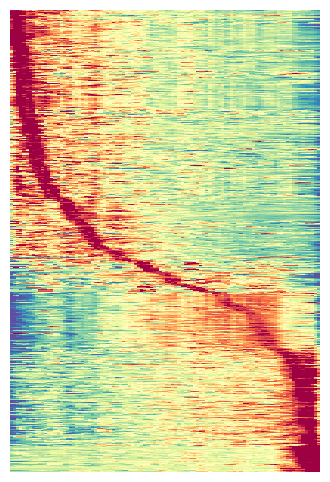

In [8]:
# plot the heatmap
plt.figure(figsize=(4,6))
sns.heatmap(df_plot, cmap='Spectral_r', xticklabels=False, yticklabels=False, cbar=False)
plt.show()

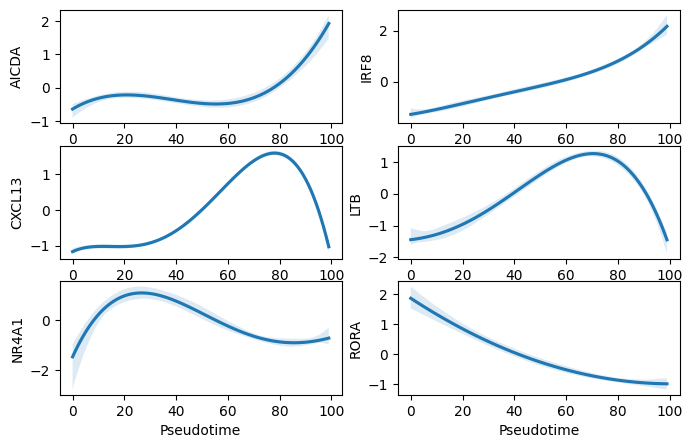

In [20]:
# representative gene plot

plot_genes = ['AICDA', 'IRF8', 'CXCL13', 'LTB', 'NR4A1', 'RORA']
my_order = [3, 4, 4, 4, 4, 2]

idx = 0
fig, axes = plt.subplots(figsize=(8, 5), nrows=3, ncols=2)
for i in range(3):
    for j in range(2):
        gene = plot_genes[idx]
        df_cur = pd.DataFrame(df_plot.loc[gene])
        df_cur['Pseudotime'] = range(100)
        sns.regplot(x='Pseudotime', y=gene, data=df_cur, order=my_order[idx], scatter=False, ax=axes[i, j])
        idx += 1
plt.show()

In [31]:
# pseudotime velocity

# Load the pseudotime information
num_bin = 110
df_time = pd.read_csv('/data/yuchen_data/Stereo_seq/All_Figures/Figure2/1.data/NaiveB_GC_trajectory_pseudotime.txt', index_col=0, sep='\t')
df_time.columns = ['pseudotime']
df_time.sort_values('pseudotime', inplace=True)
ddd = np.linspace(0, df_time.shape[0], num=num_bin+1, endpoint=True,retstep=False, dtype=int)
tmp = []
for idx in range(1, len(ddd)):
    tmp.extend([idx]*(ddd[idx]-ddd[idx-1]))
df_time['bin_split'] = tmp

df_time

,pseudotime,bin_split
ST2907B_BIN.201119,0.000000,1
ST2907B_BIN.201578,0.000556,1
ST2907B_BIN.198991,0.000556,1
ST2907B_BIN.181638,0.001111,1
ST2907B_BIN.202171,0.001111,1
...,...,...
ST2907B_BIN.197413,973.133551,110
ST2907T_BIN.127336,974.532992,110
ST2907T_BIN.135283,976.090674,110
ST2907T_BIN.133693,977.487381,110


In [33]:
# calculate pseudotime velocity

all_mean = []
all_slope = []

def bootstrap(bin_idx, n_cell):
    cur_v = df_time[df_time['bin_split'] == bin_idx].pseudotime.values
    return list(np.random.choice(cur_v, n_cell, replace=False))

num_cell = int(2601 / num_bin * 0.7)
# repeat 1000 times
for boost_n in range(1000):
    rst_l = []
    rst_slope = []
    for bin_idx in df_time.bin_split.unique():
        cur_rst = bootstrap(bin_idx, num_cell)
        rst_l.append(np.mean(cur_rst))
        cur_rst = sorted(cur_rst)
        cur_slope = np.polyfit(range(len(cur_rst)), cur_rst, 1)[0]
        rst_slope.append(cur_slope)
    all_mean.append(rst_l)
    all_slope.append(rst_slope)

df_value = pd.DataFrame(all_mean)
df_slope = pd.DataFrame(all_slope)

df_slope

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.000358,0.464218,0.955953,0.547924,1.272456,1.296237,0.548061,1.217907,0.003555,0.001009,...,0.277228,1.445181,1.946280,0.928136,2.638885,0.404211,0.669742,0.329879,1.720705,0.379792
1,0.000410,0.499373,0.921123,0.611733,1.272563,1.376793,0.599530,1.354798,0.054806,0.000710,...,0.276355,1.369366,2.375191,0.928329,2.584634,0.474665,0.616297,0.297970,2.090886,0.471409
2,0.000426,0.461311,1.118688,0.544267,0.648180,1.361967,0.517142,1.402023,0.002987,0.000891,...,0.252108,1.404726,2.237337,0.965620,2.833897,0.461027,0.654493,0.266992,2.139575,0.548135
3,0.000347,0.507200,1.080474,0.569355,0.648131,1.380052,0.555946,1.538168,0.135175,0.000884,...,0.242441,1.499341,2.136051,0.783301,2.973883,0.320213,0.690221,0.287665,1.910140,0.404202
4,0.000425,0.449936,0.791548,0.547604,1.272534,1.360280,0.434810,1.302971,0.135005,0.001001,...,0.247690,1.357489,2.467400,0.871463,2.843069,0.364200,0.704025,0.283132,1.890818,0.351154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000427,0.525656,0.936586,0.564300,0.902596,1.225345,0.600444,1.386390,0.135328,0.000678,...,0.255022,1.342592,1.859321,0.860264,2.827071,0.420389,0.754552,0.265034,2.086321,0.366157
996,0.000346,0.443601,1.014422,0.549089,1.110637,1.279345,0.564019,1.520445,0.136012,0.000846,...,0.240956,1.325532,1.849055,0.811640,2.592721,0.358635,0.709362,0.306540,2.140873,0.463742
997,0.000385,0.475535,1.054078,0.539389,1.110648,1.333861,0.546062,1.445940,0.136045,0.000790,...,0.277887,1.446153,2.199918,0.923362,2.619076,0.477713,0.654997,0.274401,2.359700,0.434651
998,0.000320,0.501669,0.873976,0.484752,1.272412,1.113353,0.486670,1.475660,0.054404,0.000848,...,0.241096,1.314031,2.016056,0.870207,2.985895,0.484006,0.717029,0.253967,2.256790,0.308871


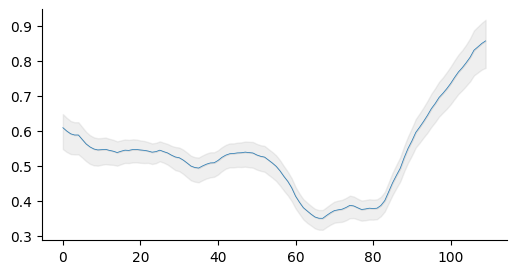

In [45]:
def smooth_inhose(y, num):
    y1 = []
    for i in range(0, num//2):
        y1.append(sum(y[:(i+num//2+1)])/(i+num//2+1))
    for i in range(num//2, (len(y)-num//2)):
        y1.append(sum(y[(i-num//2):(i-num//2 + num)])/num)
    for i in range((len(y)-num//2), len(y)):
        y1.append(sum(y[(i-num//2):])/(len(y)-i + num//2))
    return np.array(y1)


# first round of smooth
smooth_num = 35
dic_smooth = {}
for gene, row in df_slope.iterrows():
    v1 = df_slope.loc[gene].values
    v_new = smooth_inhose(v1, smooth_num)
    dic_smooth[gene] = v_new
df_smooth = pd.DataFrame.from_dict(dic_smooth, orient='index', columns=df_slope.columns)

# second round of smooth
smooth_num = 8
dic_smooth = {}
for gene, row in df_smooth.iterrows():
    v1 = df_smooth.loc[gene].values
    v_new = smooth_inhose(v1, smooth_num)
    dic_smooth[gene] = v_new
df_smooth_2 = pd.DataFrame.from_dict(dic_smooth, orient='index', columns=df_smooth.columns)



fig, ax4 = plt.subplots(figsize=(6,3))
ax4.plot(range(df_smooth_2.shape[1]), df_smooth_2.median().values, linewidth=0.5)
# plt.plot(range(df.shape[1]), np.percentile(df, 99.75, axis=0), c='orange', linewidth=0.15)
# plt.plot(range(df.shape[1]), np.percentile(df, 0.25, axis=0), c='orange', linewidth=0.15)
ax4.fill_between(range(df_smooth_2.shape[1]),df_smooth_2.median().values,np.percentile(df_smooth_2, 99.75, axis=0),color='#969696',alpha=0.15)
ax4.fill_between(range(df_smooth_2.shape[1]),df_smooth_2.median().values,np.percentile(df_smooth_2, 0.25, axis=0),color='#969696',alpha=0.15)
# ax4.spines['bottom'].set_alpha(0)
ax4.spines['top'].set_alpha(0)
ax4.spines['right'].set_alpha(0)
# ax4.spines['left'].set_alpha(0)
plt.show()